# Part-of-Speech Tagging Worksheet

**Objective**: This worksheet aims to help you understand and implement part-of-speech (POS) tagging using Python. You will explore different POS tagging techniques and libraries to get hands-on experience with this important natural language processing task.

Duration: 1 hour


## Part 1 POS Tagging with NLTK

The Natural Language Toolkit (NLTK) is a popular library for NLP tasks in Python. In this part, you will use the NLTK library to perform POS tagging.

### Task 1: Setup and explore NLTK
1. Install the NLTK library if you haven't already:



```
pip install nltk
```



In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


2. Import the necessary modules and download the required datasets:



```
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
```


In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\markd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\markd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Task 2: Tokenize and tag a sentence
1. Write a function `tokenize_sentence(sentence)` that takes a sentence as input and returns a list of tokens. Use the `nltk.word_tokenize()` function to tokenize the sentence.

2. Write a function `tag_sentence(tokens)` that takes a list of tokens as input and returns a list of tuples containing the token and its corresponding POS tag. Use the `nltk.pos_tag()` function to tag the tokens.

3. Test your functions with the following sentence: "The quick brown fox jumps over the lazy dog."

In [3]:
# Task 2: Tokenize and tag a sentence

def tokenize_sentence(sentence):
    return nltk.word_tokenize(sentence)

def tag_sentence(tokens):
    return nltk.pos_tag(tokens)

test_sentence = "The quick brown fox jumps over the lazy dog."
tokens = tokenize_sentence(test_sentence)
nltk_tags = tag_sentence(tokens)

# Print the tokens and tagged tokens
print("\nTokens:", tokens)
print("\nTagged Tokens:", nltk_tags)
print("\n")
print("-"*125)


Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']

Tagged Tokens: [('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


-----------------------------------------------------------------------------------------------------------------------------


### Task 3: Analyze POS tags
1. Write a function `tag_frequencies(tagged_tokens)` that takes a list of tagged tokens and returns a dictionary containing the frequency of each POS tag.

2. Test your function with the tagged tokens from Task 2.

In [4]:
def tag_frequencies(tagged_tokens):
    freqs = {}
    for token in tagged_tokens:
        tag = token[1]
        if tag in freqs:
            freqs[tag] += 1
        else:
            freqs[tag] = 1
    return freqs

nltk_tag_freqs = tag_frequencies(nltk_tags)
print("\n")
print(nltk_tag_freqs)
print("\n")
print("-"*125)



{'DT': 2, 'JJ': 2, 'NN': 3, 'VBZ': 1, 'IN': 1, '.': 1}


-----------------------------------------------------------------------------------------------------------------------------


## Part 2: POS Tagging with spaCy
spaCy is another popular library for NLP tasks in Python. In this part, you will use the spaCy library to perform POS tagging.

### Task 4: Setup and explore spaCy
1. Install the spaCy library and the English language model if you haven't already:

```
pip install spacy
python -m spacy download en_core_web_sm
```

In [5]:
# Part 2: POS Tagging with spaCy

# Task 4: Setup and explore spaCy

import spacy
nlp = spacy.load('en_core_web_sm')
#to do - explore nlp() with a test sentence

# Define a test sentence
test_sentence = "The quick brown fox jumps over the lazy dog."
doc = nlp(test_sentence)

print("\n")
# Iterate over the tokens in the Doc object
for token in doc:
    # Print the token text, its dependency relation and the head token text
    print(token.text, token.dep_, token.head.text)
    
print("\n")
print("-"*125)



The det fox
quick amod fox
brown amod fox
fox nsubj jumps
jumps ROOT jumps
over prep jumps
the det dog
lazy amod dog
dog pobj over
. punct jumps


-----------------------------------------------------------------------------------------------------------------------------


## Task 5: Tokenize and tag a sentence with spaCy
1. Write a function `tag_sentence_spacy(sentence)` that takes a sentence as input and returns a list of tuples containing the token and its corresponding POS tag. Use the `nlp()` function from spaCy to tokenize and tag the sentence.

2. Test your function with the following sentence: "The quick brown fox jumps over the lazy dog."

In [6]:
# Task 5: Tokenize and tag a sentence with spaCy

def tag_sentence_spacy(sentence):
    doc = nlp(sentence)
    return [(token.text, token.pos_) for token in doc]

#to do - test the function and check the output that you get
spacy_tags = tag_sentence_spacy(test_sentence)

print("\n")
print(spacy_tags)
print("\n")
print("-"*125)



[('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN'), ('.', 'PUNCT')]


-----------------------------------------------------------------------------------------------------------------------------


### Task 6: Compare NLTK and spaCy
1. Write a function `compare_taggers(nltk_tags, spacy_tags)` that takes two lists of tagged tokens (one from NLTK and one from spaCy) and returns the number of differences between the two sets of tags.

2. Test your function with the tagged tokens from Tasks 2 and 5.

In [7]:
# Task 6: Compare NLTK and spaCy

def compare_taggers(nltk_tags, spacy_tags):
    differences = 0
    for (nltk_token, nltk_tag), (spacy_token, spacy_tag) in zip(nltk_tags, spacy_tags):
        if nltk_token == spacy_token and nltk_tag != spacy_tag:
            differences += 1
    return differences

# Define a test sentence
test_sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize and tag the sentence using NLTK
nltk_tokens = tokenize_sentence(test_sentence)
nltk_tags = tag_sentence(nltk_tokens)

# Tokenize and tag the sentence using spaCy
spacy_tags = tag_sentence_spacy(test_sentence)

# Compare the tags
differences = compare_taggers(nltk_tags, spacy_tags)

# Print the number of differences
print("\nNumber of tag differences:", differences)
print("\n")
print("-"*125)


Number of tag differences: 10


-----------------------------------------------------------------------------------------------------------------------------


## Part 3: Hands-on exercise
1. Find a news article or a paragraph from a news website and copy the text into a string variable.

2. Use both NLTK and spaCy to tokenize and tag the text. Compare the results and note any differences in the POS tags assigned by the two libraries.

3. Create a visualization (e.g., bar chart or pie chart) to display the POS tag distribution in the text using a library like Matplotlib or Seaborn. How does the distribution of POS tags help you understand the structure and content of the text?

4. Choose a specific POS tag (e.g., nouns, verbs, or adjectives) and create a list of unique tokens with that tag from the text. How do these tokens contribute to the meaning or theme of the text?

5. Write a brief summary of your findings and observations from the hands-on exercise. Include any interesting insights or challenges you faced while working with POS tagging and the two libraries.



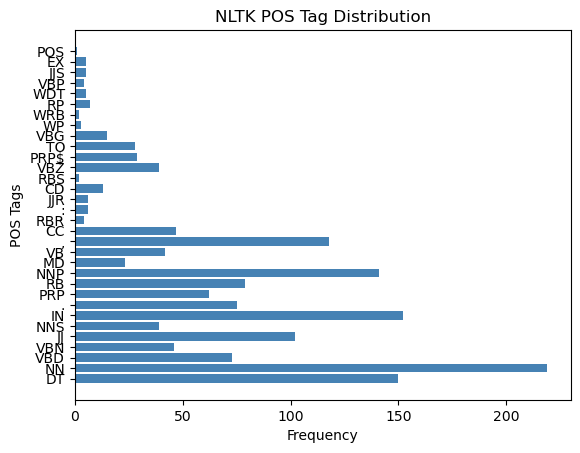

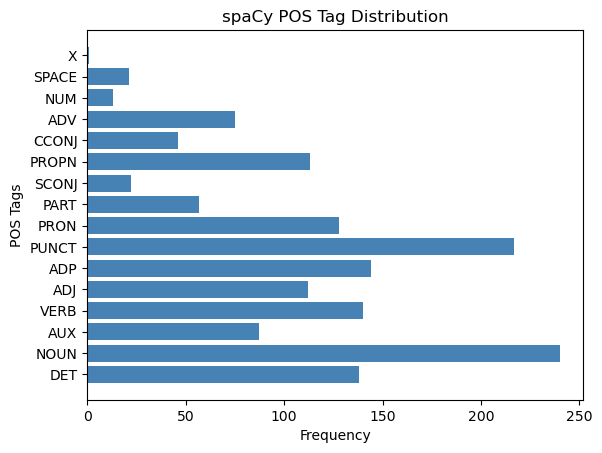

NLTK Nouns: ['pinnacle', 'midnight', 'climax', 'move', 'something', 'error', 'fault', 'doorway', 'day', 'decade', 'purchase', 'investment', 'vehicle', 'bin', 'al', 'deputy', 'minister', 'project', 'soccer', 'form', 'conclusion', 'soccer', 'force', 'season', 'hurdle', 'resistance', 's', 'path', 'Victory', 'trophy', 'moment', 'hand', 'glitter', 'fireworks', 'sky', 'gaze', 'team', 'flesh', 'time', '—', 'brother', 'bin', 'al', 'ruler', 'champion', 'fact', 'team', '—', 'handful', '—', 'treble', 'soccer', 'challenge', 'hallmark', 'greatness', 'sort', 'team', 'titan', 'aim', 'scale', 'investment', 'surprise', 'Soccer', 'sport', 'business', 'estimate', 'project', 'nothing', 'couple', 'Nothing', 'chance', 'manager', 'petrol', 'ideas.', '”', 'thing', 'money', 'training', 'world', 'academy', 'network', 'sister', 'bespoke', 'squad', 'recruitment', 'team', 'cost', 'coach', 'world', 'soccer', 'galaxy', 'brain', 'everything', 'allegation', 'success', 'everyone', 'web', 'club', 'course', 'nothing', 'c

In [8]:
# Part 3: Hands-on exercise

# Replace the text variable with your chosen text
# Text extracted from: https://www.nytimes.com/live/2023/06/10/sports/man-city-inter-milan-champions-league

text = """The pinnacle was reached a few minutes before midnight. It did not come as Manchester City might have dreamed, at the fantastical climax of some wondrous, intricate move, but with something more arbitrary, more human: a minor error, little more than a technical fault, levered open and swiftly punished, at the doorway between one day and the next.

A decade and a half since City’s lightning-strike purchase by an investment vehicle fronted by Sheikh Mansour bin Zayed al Nahyan, the deputy prime minister of the United Arab Emirates, the most ambitious project soccer has ever seen finally had found its ultimate form, its inevitable conclusion.

City had long ago established itself as English soccer’s dominant force. It had claimed five of the last six Premier League titles. It had won the F.A. Cup this season, too. Now, at last hurdle, it had broken the resistance of Inter Milan, the last of Europe’s grand old houses to stand in its path. Victory in the Champions League, the one trophy it had not yet claimed and the moment it had craved more than any other, was at hand.

As the glitter fell and the fireworks leaped into the sky, under the watchful gaze of both Sheikh Mansour — seeing the team he owns in the flesh for just the second time — and his brother, Sheikh Mohamed bin Zayed al Nahyan, the ruler of the U.A.E., Manchester City could finally call itself champion of Europe.

More than that, in fact: City is now only the second English team — and one of only a select handful of clubs across Europe — to have completed a domestic and European treble, soccer’s final challenge, its hallmark of true greatness. This is exactly what Abu Dhabi envisioned, 15 years ago, when it acquired City, a middleweight sort of a team, and set out to make it a titan.

That it has achieved its aim, given the scale of its investment, should not be a surprise. This was always going to happen, sooner or later: Soccer is a sport, but it is also a business. By even a conservative estimate, the Manchester City project, designed in the palaces of the Persian Gulf for reasons that have little or nothing to do with sports, has cost a couple of billion dollars.

Nothing has been left to chance. City was dangerous, the former Arsenal manager Arsène Wenger once said, because it had both “petrol and ideas.” It is one thing having money. It is quite another knowing how to use it.

City most certainly does. It has one of the finest training facilities in the world. It has a state-of-the-art academy, a global network of sister teams, a bespoke squad stuffed with players handpicked by a vast, expert recruitment team, regardless of their cost. It has Pep Guardiola, the finest coach in the world, soccer’s own galaxy brain, and he has everything he could possibly want.

The allegation remains that there is more behind its success: that City has not played by the same rules as everyone else, that it has used its web of sponsors in the U.A.E. to circumvent the financial regulations of first UEFA and then the Premier League.

The club denies all of it, of course, claiming it is nothing but a conspiracy of the jealous and the threatened. It has a comprehensive body of irrefutable evidence that will provide vindication, it says. It has yet to produce it. UEFA’s charges did not stick. Whether the Premier League’s might, all 115 of them, may yet take years to discover.

City has done — or not done, as the case may be — it all in the service of this: not just victory, not just a form of domination that has rarely, if ever, been seen, but in the overturning of European soccer’s established order.

In the years to come, the manner in which it took the final step will be all but forgotten. It would, in fact, have slipped from the minds of City’s players and their fans almost as soon as the final whistle blew on Saturday night and Guardiola and his staff poured from the bench, euphoric and disbelieving and more than a little relieved. He was brought to the club for this express purpose. It has surely taken longer than he would have liked to deliver.

He certainly will not dwell for long on the nature of his triumph, his third Champions League trophy, his second European treble as a manager. He might be a perfectionist, but he will not care in the slightest that City found only the slightest crack in Inter’s armor — a slip from the otherwise flawless Federico Dimarco sending Bernardo Silva scampering free, and Rodri placing an unerring shot in the corner — or that by City’s standards this was an underwhelming display in an underwhelming final.

There was, though, something entirely fitting about it. City’s opponent, Inter Milan, had arrived in Istanbul as something of a surprise. It was expected, deep down, to play the role of sacrificial lamb, swatted aside casually by a City team that seemed, in every conceivable way, to be its superior.

City is England’s default champion. Inter is the third-best team in Italy. City possesses Erling Haaland, a striker who is soccer’s equivalent to the T1000, sent from the future to obliterate every record he can. Inter’s team is old, even by the gerontocratic standards of Serie A. This final was, in most reckonings, a mismatch, a procession, a fait accompli.

European soccer, though, has proved rather harder to conquer than Abu Dhabi might have envisaged. The Premier League might have been bent, after a while, to City’s will, but the Champions League has always foxed it: full of vagaries and hazards and what must at times have started to seem like magic.

No wonder, then, that Inter’s obduracy and its conviction put City off its stride. There was no desperate rear-guard action, no black-and-blue Helm's Deep. Instead, Simone Inzaghi’s Inter side drew deep from its well of experience to frustrate City in every way it could conceive.

It dawdled over free kicks. It lingered in possession. It indulged in petty, niggling fouls, robbing the game of its rhythm. It drew the pace, and with it the sting, from City’s fearsome attack. At times, it stood still, unwilling to be drawn from its positions. Proudly, Inter made the game as ugly as it could.

And it did it all to perfection, or something close to it. Guardiola raged on the touchline. “Relax, relax,” he barked at his players, his hands clawing at his cheeks, a pot pointing out as many flaws as possible in the kettle. There is more to soccer than beauty, and skill, and panache. There is also grit and grizzle, gnarl and nous, and Inter had them all in abundance.

Ultimately, though, it was not enough. That has been the story of Manchester City in these last 15 years, told from the perspective of everyone else. Nothing has ever been enough. City will not, in the end, be stopped.

It would be unfair to say Inter’s focus waned, even for a second. Dimarco simply put one of his feet in the wrong place. His body shape was wrong as he tried to intercept a pass. He stumbled. Silva was away. His cross deflected back into Rodri’s path, and in that moment, arbitrary and human, Inter’s resistance broke, and with it the last bulwark of European soccer’s traditional aristocracy, its grand old houses.

Manchester City, as it was always going to, had at last broken down the door. The whistle blew. The glitter fell. The fireworks exploded. And in the middle of its celebrations, one day ended, and another began."""

# To Do - Tokenize and tag with both NLTK and spaCy
nltk_tokens = nltk.word_tokenize(text)
nltk_tags = nltk.pos_tag(nltk_tokens)

# To Do - Calculate the differences in POS tags
spacy_doc = nlp(text)
spacy_tags = [(token.text, token.pos_) for token in spacy_doc]

# Import the Counter class from the collections module
from collections import Counter

# The calculate_differences function counts the frequency of each POS tag in both nltk_tags and spacy_tags
def calculate_differences(nltk_tags, spacy_tags):
    nltk_tag_dict = dict(Counter(tag for word, tag in nltk_tags))
    spacy_tag_dict = dict(Counter(tag for word, tag in spacy_tags))

    diff = {}
    for tag in set(nltk_tag_dict.keys()).union(spacy_tag_dict.keys()):
        diff[tag] = nltk_tag_dict.get(tag, 0) - spacy_tag_dict.get(tag, 0)

    return diff

tag_diff = calculate_differences(nltk_tags, spacy_tags)

# The tag_frequencies function counts the frequency of each POS tag in a given list of tagged tokens
def tag_frequencies(tags):
    return dict(Counter(tag for word, tag in tags))

# Visualize the POS tag distribution
import matplotlib.pyplot as plt

# The plot_pos_distribution function creates a bar chart of the POS tag frequencies
def plot_pos_distribution(tag_freqs, title):
    tags, freqs = zip(*tag_freqs.items())

    # Check the number of tags
    if len(tags) > 15:
        # Use a horizontal bar chart for a large number of tags
        plt.barh(tags, freqs, color='steelblue')
        plt.ylabel('POS Tags')
        plt.xlabel('Frequency')
        plt.title(title)
    else:
        # Rotate x-axis labels for a small number of tags
        plt.bar(tags, freqs, color='steelblue')
        plt.xticks(rotation=90)  # Rotate x-axis labels
        plt.xlabel('POS Tags')
        plt.ylabel('Frequency')
        plt.title(title)
    
    plt.show()

# Call the plot_pos_distribution function for both nltk_tag_freqs and spacy_tag_freqs
nltk_tag_freqs = tag_frequencies(nltk_tags)
plot_pos_distribution(nltk_tag_freqs, 'NLTK POS Tag Distribution')

spacy_tag_freqs = tag_frequencies(spacy_tags)
plot_pos_distribution(spacy_tag_freqs, 'spaCy POS Tag Distribution')

# Analyze specific POS tags (e.g., nouns)
def extract_specific_pos(tagged_tokens, target_pos):
    return [token for token, pos in tagged_tokens if pos == target_pos]

nltk_nouns = extract_specific_pos(nltk_tags, 'NN')
spacy_nouns = extract_specific_pos(spacy_tags, 'NOUN')

# Print your findings and observations
print("NLTK Nouns:", nltk_nouns)
print("\nspaCy Nouns:", spacy_nouns)
print("\nPOS Tagging Differences:", tag_diff)
print("\n")
print("-"*125)